## 직방 아파트 가격 예측 : 탐색

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import warnings
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.

### 1. 데이터 불러와서 살펴보기.

In [2]:
os.chdir(r'..\data')

In [3]:
df = pd.read_csv('data_zigbang_2.csv', header='infer',encoding = 'latin')

In [4]:
df.shape

(301400, 27)

In [5]:
df.head(3)

,apartment_id,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_parking_capacity_in_site,...,room_count,bathroom_count,transaction_real_price,transaction_year,transaction_month,transaction_quarter,old,area_ratio,parking_household,y
0,15492,201601,15,2008,94.51,2,37.574417,126.968883,1111011500,1480.0,...,3.0,2.0,845000000,2016,1,1,8,0.834599,2.252664,20.554847
1,15492,201601,15,2008,94.28,12,37.574417,126.968883,1111011500,1480.0,...,3.0,2.0,800000000,2016,1,1,8,0.834706,2.252664,20.500122
2,9174,201601,15,2003,48.54,9,37.575113,126.990056,1111013300,228.0,...,1.0,1.0,300000000,2016,1,1,13,0.806983,0.783505,19.519293


In [6]:
features = list(df.columns)

### 2. 탐색.

#### 변수별 고유한 값의 가짓수 출력.

In [7]:
for aFeature in features:
    nUnique = df[aFeature].nunique()
    print(" {} : {} ".format(aFeature,nUnique))

 apartment_id : 2620 
 transaction_year_month : 34 
 transaction_date : 3 
 year_of_completion : 50 
 exclusive_use_area : 5519 
 floor : 70 
 latitude : 2619 
 longitude : 2616 
 address_by_law : 263 
 total_parking_capacity_in_site : 1174 
 total_household_count_in_sites : 964 
 apartment_building_count_in_sites : 55 
 tallest_building_in_sites : 49 
 lowest_building_in_sites : 44 
 room_id : 12102 
 supply_area : 6713 
 total_household_count_of_area_type : 683 
 room_count : 8 
 bathroom_count : 6 
 transaction_real_price : 4240 
 transaction_year : 3 
 transaction_month : 12 
 transaction_quarter : 4 
 old : 51 
 area_ratio : 11905 
 parking_household : 2222 
 y : 4240 


#### 종속변수.

In [8]:
# 3000 만 ~ 82억.
print("Max price : {}".format(df.transaction_real_price.max()/10**6))   # 단위 = 100만.
print("Min price : {}".format(df.transaction_real_price.min()/10**6))   # 단위 = 100만.

Max price : 8200.0
Min price : 30.0


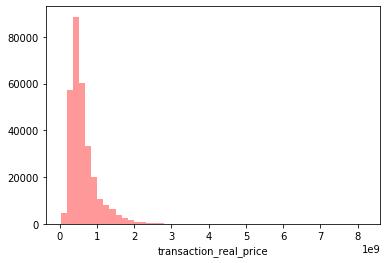

In [9]:
# 히스토그램.
sns.distplot(df['transaction_real_price'], kde=False, rug=False, bins=50, color='red')  
plt.show()

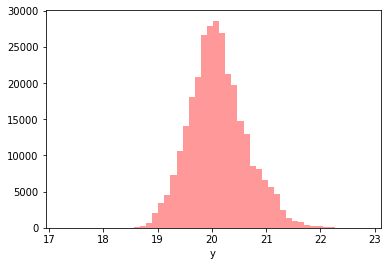

In [10]:
# 로그 변환후 히스토그램.
sns.distplot(df['y'], kde=False, rug=False, bins=50, color='red')  
plt.show()

#### apartment_id의 도수분포.

In [11]:
tab = df['apartment_id'].value_counts()
tab[tab > 1000]            # 도수가 특별히 높은 곳.

16156    6209
21931    2215
15985    2027
1284     1801
16629    1638
20043    1620
895      1513
15953    1442
8702     1259
5047     1230
903      1204
5280     1151
122      1032
Name: apartment_id, dtype: int64

#### transaction_year, month, date & old 탐색.

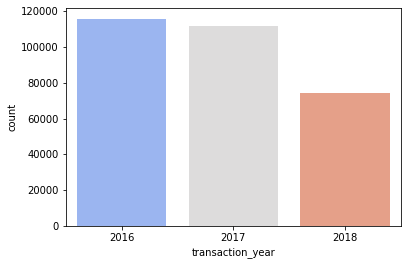

In [12]:
# 도수분포표를 막대그림으로 나타냄.
# 인자 x만 필요함.
sns.countplot(x='transaction_year', data=df, palette='coolwarm')
plt.show()

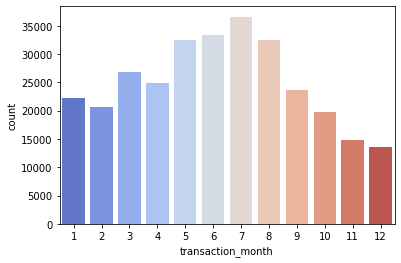

In [13]:
sns.countplot(x='transaction_month', data=df, palette='coolwarm')
plt.show()

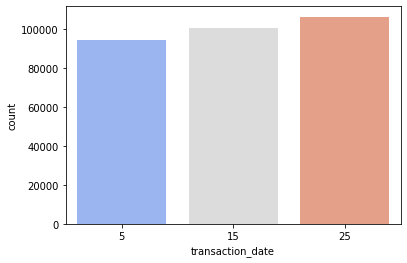

In [14]:
sns.countplot(x='transaction_date', data=df, palette='coolwarm')
plt.show()

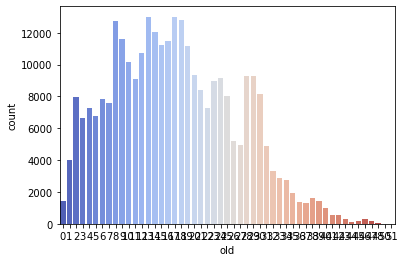

In [15]:
sns.countplot(x='old', data=df, palette='coolwarm')
plt.show()

#### 가격 추이.

In [16]:
# 년도별 평균가격.
np.round(df.groupby('transaction_year')['transaction_real_price'].mean()/10**6,2) # 100만 단위.

transaction_year
2016    567.40
2017    657.72
2018    697.03
Name: transaction_real_price, dtype: float64

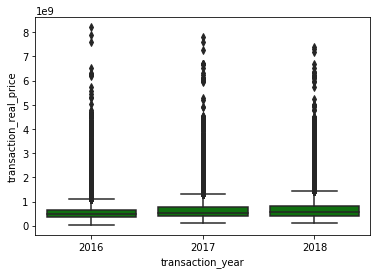

In [17]:
# 년도별 가격 박스플롯.
sns.boxplot(x='transaction_year',y='transaction_real_price', data=df, color='green')
plt.show()

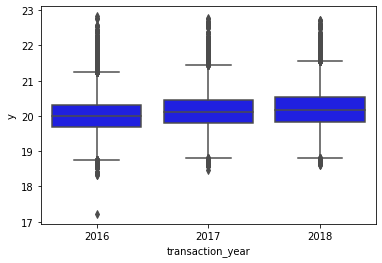

In [18]:
# 년도별 로그 가격 박스플롯.
sns.boxplot(x='transaction_year',y='y', data=df, color='blue')
plt.show()

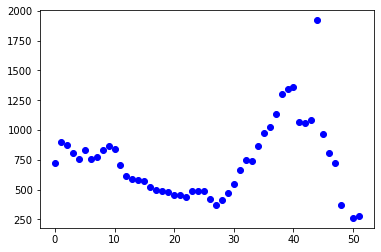

In [19]:
# old 별 평균가격.
dat = np.round(df.groupby('old')['transaction_real_price'].mean()/10**6,2)  # 100만 단위.
plt.scatter(x=dat.index, y=dat.values, color='blue')
plt.show()

In [20]:
# 위 그래프를 보고 old_cat 변수를 만들기로 함.
i1 = ( df.old <= 28)  
i2 = ( 28 < df.old) & (df.old <= 40) 
i3 = ( 40 < df.old)

In [21]:
# old_cat 파생변수.
df['old_cat'] = df['old']
df['old_cat'][i1] = 'a'
df['old_cat'][i2] = 'b'
df['old_cat'][i3] = 'c'

#### year_of_completion.

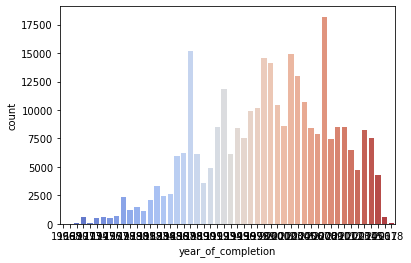

In [22]:
sns.countplot(x='year_of_completion', data=df, palette='coolwarm')
plt.show()

In [23]:
print(np.round(df.old.corr(df.year_of_completion),3))      # 거의 100% 매치.

-0.997


#### exclusive_use_area, area_ratio 대 가격.

In [24]:
myRange = np.arange(df.shape[0])
np.random.shuffle(myRange)
iSample = myRange[:1000]                  # 1000 개만 사용.

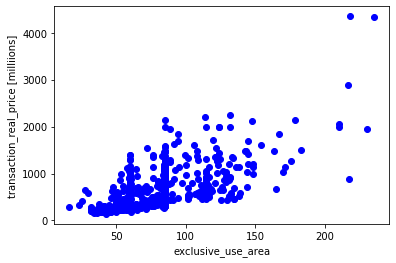

In [25]:
plt.scatter(df.loc[iSample,:].exclusive_use_area, df.loc[iSample,:].transaction_real_price/10**6,color='blue')
plt.xlabel('exclusive_use_area')
plt.ylabel('transaction_real_price [milliions]')
plt.show()

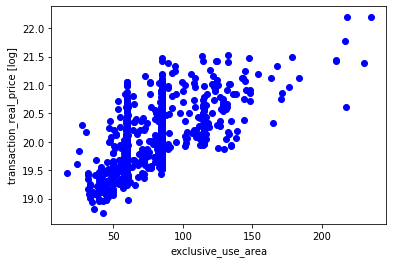

In [26]:
plt.scatter(df.loc[iSample,:].exclusive_use_area, df.loc[iSample,:].y,color='blue')
plt.xlabel('exclusive_use_area')
plt.ylabel('transaction_real_price [log]')
plt.show()

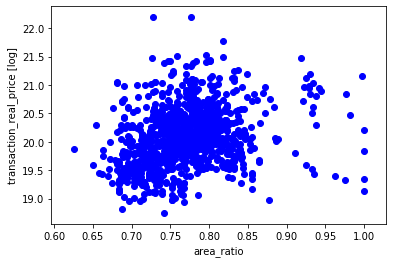

In [27]:
plt.scatter(df.loc[iSample,:].area_ratio, df.loc[iSample,:].y,color='blue')
plt.xlabel('area_ratio')
plt.ylabel('transaction_real_price [log]')
plt.show()

#### room_count 대 가격.

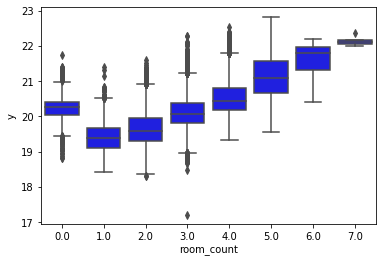

In [28]:
sns.boxplot(x='room_count',y='y', data=df, color='blue')
plt.show()

In [29]:
# 위 그래프를 보고 room_count_cat 변수를 만들기로 함.
i1 = ( df.room_count == 0)  
i2 = ( df.room_count != 0) 
df['room_count_cat'] = df['room_count']
df['room_count_cat'][i1] = 'a'
df['room_count_cat'][i2] = 'b'

#### bathroom_count 대 가격.

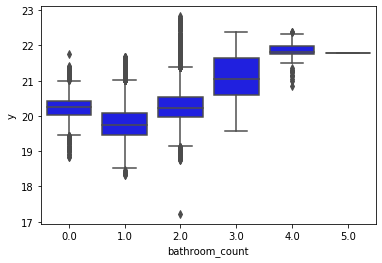

In [30]:
sns.boxplot(x='bathroom_count',y='y', data=df, color='blue')
plt.show()

In [31]:
# 위 그래프를 보고 bathroom_count_cat 변수를 만들기로 함.
i1 = ( df.bathroom_count == 0)  
i2 = ( df.bathroom_count != 0) 
df['bathroom_count_cat'] = df['bathroom_count']
df['bathroom_count_cat'][i1] = 'a'
df['bathroom_count_cat'][i2] = 'b'

#### total_parking_capacity_in_site, parking_houseld 대 가격.

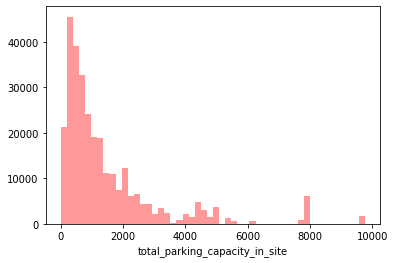

In [32]:
# 히스토그램.
sns.distplot(df['total_parking_capacity_in_site'], kde=False, rug=False, bins=50, color='red')  
plt.show()

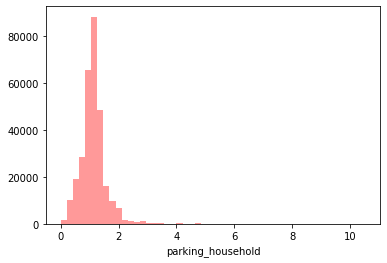

In [33]:
# 히스토그램.
sns.distplot(df['parking_household'], kde=False, rug=False, bins=50, color='red')  
plt.show()

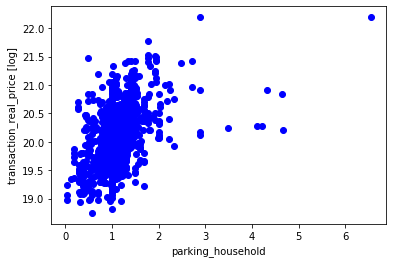

In [34]:
plt.scatter(df.loc[iSample,:].parking_household, df.loc[iSample,:].y,color='blue')
plt.xlabel('parking_household')
plt.ylabel('transaction_real_price [log]')
plt.show()

In [35]:
# 위 그래프를 보고 parking_household_cat 변수를 만들기로 함.
i1 = ( df.parking_household <= 2)  
i2 = ( df.parking_household > 2) 
df['parking_household_cat'] = df['parking_household']
df['parking_household_cat'][i1] = 'a'
df['parking_household_cat'][i2] = 'b'

#### floor 대 가격.

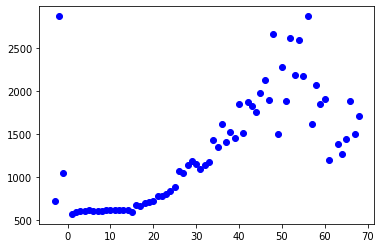

In [36]:
# floor 별 평균가격.
dat = np.round(df.groupby('floor')['transaction_real_price'].mean()/10**6,2)  # 100만 단위.
plt.scatter(x=dat.index, y=dat.values, color='blue')
plt.show()

In [37]:
# 위 그래프를 보고 floor_cat 변수를 만들기로 함.
i1 = ( df.floor <= 15 )  
i2 = ( 15 < df.floor ) & ( df.floor <= 50 )
i3 = ( 50 < df.floor )
df['floor_cat'] = df['floor']
df['floor_cat'][i1] = 'a'
df['floor_cat'][i2] = 'b'
df['floor_cat'][i3] = 'c'

#### tallest_building_in_sites, lowest_building_in_sites 대 가격.

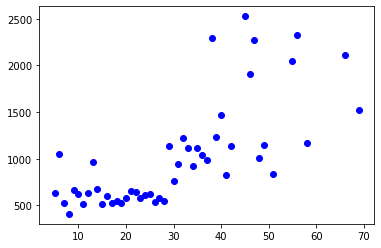

In [38]:
dat = np.round(df.groupby('tallest_building_in_sites')['transaction_real_price'].mean()/10**6,2)  # 100만 단위.
plt.scatter(x=dat.index, y=dat.values, color='blue')
plt.show()

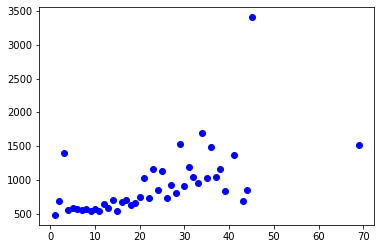

In [39]:
dat = np.round(df.groupby('lowest_building_in_sites')['transaction_real_price'].mean()/10**6,2)  # 100만 단위.
plt.scatter(x=dat.index, y=dat.values, color='blue')
plt.show()

#### total_household_count_in_sites, apartment_building_count_in_sites 대 가격.

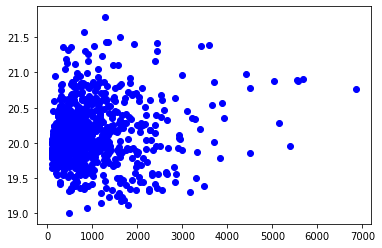

In [40]:
dat = df.groupby('total_household_count_in_sites')['y'].mean() 
plt.scatter(x=dat.index, y=dat.values, color='blue')
plt.show()

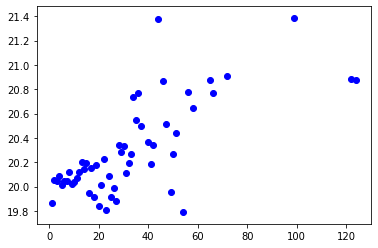

In [41]:
dat = df.groupby('apartment_building_count_in_sites')['y'].mean() 
plt.scatter(x=dat.index, y=dat.values, color='blue')
plt.show()

#### total_household_count_of_area_type 대 가격.

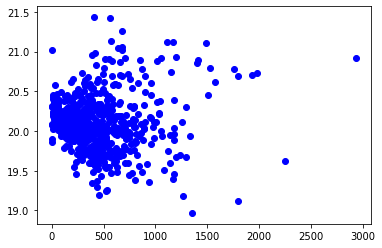

In [42]:
dat = df.groupby('total_household_count_of_area_type')['y'].mean() 
plt.scatter(x=dat.index, y=dat.values, color='blue')
plt.show()

### 3. 외부 파일로 출력.

In [43]:
df.to_csv('data_zigbang_3.csv',index=False)